In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gdp_germany_file = "gdp_germany_table.html"
percentage_military_spending_csv = "military_spending_percentage_gdp.csv"
sipri_excel = "SIPRI-Milex-data-1949-2022.xlsx"

In [3]:
pd.read_excel(sipri_excel)

/home/martin/Projects/data-is-awesome/germany_military_spending/Env/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


""


In [29]:
percentage_military_spending_df = pd.read_csv(percentage_military_spending_csv, delimiter=" ")

In [30]:
perc_df = percentage_military_spending_df.T

In [31]:
perc_df = perc_df.reset_index().rename(columns={'index': 'years', 0: 'percentage'})

In [32]:
perc_df['years'] = perc_df['years'].astype('int64')

In [33]:
# remove percentage symbol and convert to float
perc_df['percentage'] = perc_df['percentage'].str.replace(',', '.').str.rstrip('%').astype(float)

# divide each value by 100
perc_df['percentage'] = perc_df['percentage'] / 100

In [34]:
####################################################

In [35]:
gdp_df = pd.read_html(gdp_germany_file)[0].rename(columns={'Merkmal': 'years', 'Bruttoinlandsprodukt in Milliarden Euro': 'gdp in bn EURO'})

In [36]:
gdp_df['gdp in bn EURO'] = gdp_df['gdp in bn EURO'].str.replace(',', '').str.replace('.', '')
gdp_df["gdp in bn EURO"] = gdp_df['gdp in bn EURO'].astype('float')/100

/tmp/ipykernel_19917/640396110.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gdp_df['gdp in bn EURO'] = gdp_df['gdp in bn EURO'].str.replace(',', '').str.replace('.', '')


In [37]:
perc_df

,years,percentage
0,1953,0.042
1,1954,0.040
2,1955,0.041
3,1956,0.036
4,1957,0.041
...,...,...
58,2011,0.013
59,2012,0.013
60,2013,0.012
61,2014,0.012


In [38]:
gdp_df

,years,gdp in bn EURO
0,2022,3867.05
1,2021,3601.75
2,2020,3405.43
3,2019,3473.26
4,2018,3365.45
...,...,...
68,1954,80.41
69,1953,74.92
70,1952,69.75
71,1951,61.00


In [39]:
perc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   years       63 non-null     int64  
 1   percentage  63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [40]:
df = gdp_df.join(perc_df.set_index('years'), on='years')

In [41]:
#####

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   years           73 non-null     int64  
 1   gdp in bn EURO  73 non-null     float64
 2   percentage      63 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.8 KB


In [43]:
df["military_spending in bn EURO"] = df["gdp in bn EURO"] * df["percentage"]

In [44]:
df.dropna()

,years,gdp in bn EURO,percentage,military_spending in bn EURO
7,2015,3026.18,0.012,36.31416
8,2014,2927.43,0.012,35.12916
9,2013,2811.35,0.012,33.73620
10,2012,2745.31,0.013,35.68903
11,2011,2693.56,0.013,35.01628
...,...,...,...,...
65,1957,110.72,0.041,4.53952
66,1956,101.58,0.036,3.65688
67,1955,91.89,0.041,3.76749
68,1954,80.41,0.040,3.21640


In [45]:
visualize_df = df[["years", "military_spending in bn EURO"]].dropna()

In [46]:
visualize_df

,years,military_spending in bn EURO
7,2015,36.31416
8,2014,35.12916
9,2013,33.73620
10,2012,35.68903
11,2011,35.01628
...,...,...
65,1957,4.53952
66,1956,3.65688
67,1955,3.76749
68,1954,3.21640


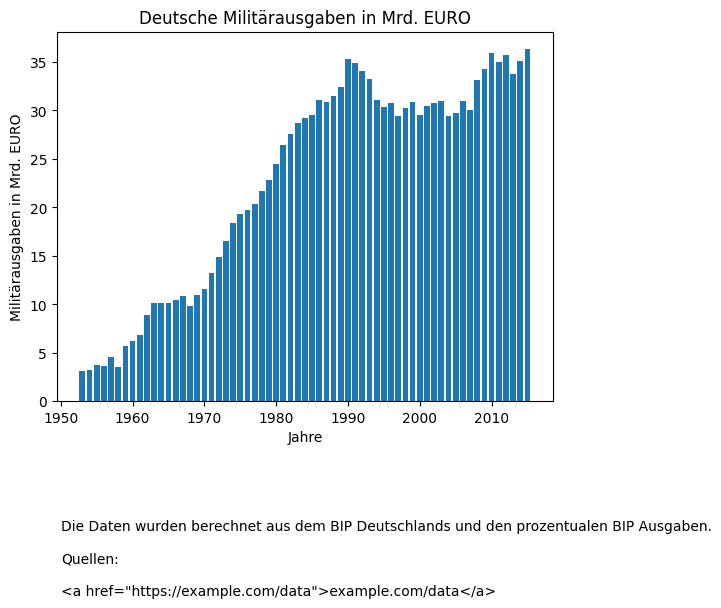

In [68]:
plt.bar(visualize_df['years'], visualize_df['military_spending in bn EURO'])

# add labels and title
plt.xlabel('Jahre')
plt.ylabel('Militärausgaben in Mrd. EURO')
plt.title('Deutsche Militärausgaben in Mrd. EURO')
description = '''Die Daten wurden berechnet aus dem BIP Deutschlands und den prozentualen BIP Ausgaben.\n
Quellen:\n
<a href="https://example.com/data">example.com/data</a>'''
plt.text(1950, -20, description, fontsize=10, verticalalignment='baseline')

# display chart
plt.show()